## Student Info
Reg Number : R182565F                                                      
Program    : CTHSC <br/>
Name       : Blessed Mutengwa <br/>
email      : blessedmutengwa@gmail.com

In [ ]:
 # import modules
 
import pandas as pd
import numpy as np
 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
 
from math import radians, cos, sin, asin, sqrt
from scipy import stats
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from google.colab import drive

In [ ]:
drive.mount('/content/drive/',force_remount=True) # mount drive

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Arrest_Data_from_2010_to_Present.csv', low_memory=False) # load dataset

In [ ]:
df.sample(5)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
911097,3978114,05/21/2014,1610.0,14.0,Pacific,1412.0,47.0,M,B,16.0,Narcotic Drug Laws,F,11379HS,TRANSPORT/SELL CONTROLLED SUBSTANCE,DUDLEY,OCEAN FRONT WK,"(33.994, -118.4798)"
100414,101710193,04/20/2010,1700.0,17.0,Devonshire,1764.0,15.0,F,H,6.0,Larceny,M,490.1(A)PC,PETTY THEFT LESS THAN $50,9300 TAMPA AV,NaN,"(34.2564, -118.5536)"
354144,151516476,08/09/2015,1300.0,15.0,N Hollywood,1511.0,23.0,M,W,6.0,Larceny,M,484(A)PC,GRAND THEFT (OVER $400),13000 SHERMAN WY,NaN,"(34.2037, -118.421)"
82792,100813052,07/23/2010,2330.0,8.0,West LA,821.0,23.0,M,H,18.0,Drunkeness,M,41.27CLAMC,DRINKING IN PUBLIC,PACIFIC COAST HY,SUNSET BL,"(34.0385, -118.5556)"
789106,3472067,02/23/2013,1200.0,21.0,Topanga,2189.0,2.0,F,B,NaN,NaN,D,300(B)WI,NaN,VENTURA BL,WINNETKA AV,"(34.171, -118.5709)"


# Data Cleaning and Reformatting

In [ ]:
df['Arrest Date'] = pd.to_datetime(df['Arrest Date']) # convert Arrest Date dtype from object to DateTime

In [ ]:
df.Location = df.Location.str.replace('(','') # Strip brackets from the Location Column
df.Location = df.Location.str.replace(')','')

In [ ]:
filter_geo_loc = df.Location.str.split(',', expand=True) # Split the Location column by comma into two columns for Lattitude and Longitude
df['Lat'] = filter_geo_loc[0]
df['Lon'] = filter_geo_loc[1]

In [ ]:
df['Lon'] = df['Lon'].astype(float) # Convert the Longitude Series from object type to float for arithmetic calculations
df['Lat'] = df['Lat'].astype(float) # Convert the Lattitude Series from object type to float for arithmetic calculations

# Exploratory Data Analytics (EDA)

In [ ]:
df.info() # Comprehensive Dataset Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227521 entries, 0 to 1227520
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Report ID                 1227521 non-null  object        
 1   Arrest Date               1227517 non-null  datetime64[ns]
 2   Time                      1227322 non-null  float64       
 3   Area ID                   1227517 non-null  float64       
 4   Area Name                 1227517 non-null  object        
 5   Reporting District        1227517 non-null  float64       
 6   Age                       1227517 non-null  float64       
 7   Sex Code                  1227517 non-null  object        
 8   Descent Code              1227517 non-null  object        
 9   Charge Group Code         1139951 non-null  float64       
 10  Charge Group Description  1139515 non-null  object        
 11  Arrest Type Code          1227516 non-null  object

In [ ]:
df.describe() # Statistical Analysis Summary

,Time,Area ID,Reporting District,Age,Charge Group Code,Lat,Lon
count,1.227322e+06,1.227517e+06,1.227517e+06,1.227517e+06,1.139951e+06,1.227516e+06,1.227516e+06
mean,1.390331e+03,1.022282e+01,1.068804e+03,3.423583e+01,1.625491e+01,3.405484e+01,-1.182767e+02
std,6.614772e+02,6.205251e+00,6.190267e+02,1.369657e+01,7.025462e+00,8.568513e-01,2.953451e+00
min,0.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,1.000000e+00,0.000000e+00,-1.188513e+02
25%,9.500000e+02,5.000000e+00,5.250000e+02,2.300000e+01,1.100000e+01,3.401210e+01,-1.184381e+02
50%,1.515000e+03,1.100000e+01,1.113000e+03,3.200000e+01,1.700000e+01,3.405780e+01,-1.183223e+02
75%,1.930000e+03,1.500000e+01,1.546000e+03,4.500000e+01,2.300000e+01,3.416810e+01,-1.182713e+02
max,2.400000e+03,2.100000e+01,2.199000e+03,9.700000e+01,9.900000e+01,3.481460e+01,0.000000e+00


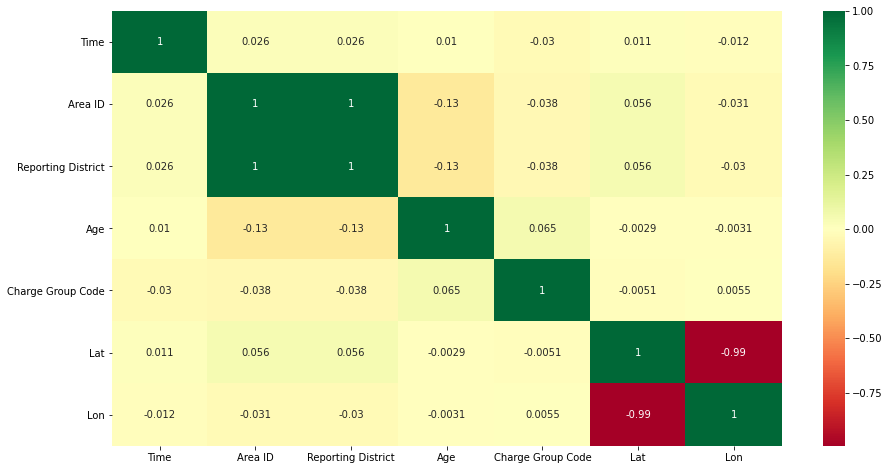

In [ ]:
corrmat = df.corr() # Calculate dataframe correlation for columns with int and float dtypes
top_corr_features = corrmat.index # Get the index from the corrmat dataframe into a list
plt.figure(figsize=(15,8)) # Define size for our plot image
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn") # plot heat map

# **Q1** 

In [ ]:
arrests_18 = df.loc[df['Arrest Date'].dt.year == 2018] # Filter data for year 2018

In [ ]:
print(f'2018 Total Arrests were : {arrests_18.shape[0]}')

2018 Total Arrests were : 42381


# **Q2** 

In [ ]:
highest = arrests_18['Area Name'].value_counts().to_frame()

In [ ]:
print(f'There were {highest["Area Name"].max()} bookings made in {highest["Area Name"].idxmax()} Area.')

There were 5621 bookings made in Central Area.


# **Q3**

In [ ]:
charge_group = arrests_18.loc[~((arrests_18['Charge Group Description']=="Pre-Delinquency") & (arrests_18['Charge Group Description']=="Non-Criminal Detention"))]

In [ ]:
charge_group.dropna(subset=['Charge Group Description'], inplace=True)

In [ ]:
arrests_18.groupby(['Charge Group Description'])['Age'].mean().to_frame().reset_index()

,Charge Group Description,Age
0,Against Family/Child,36.950355
1,Aggravated Assault,33.907359
2,Burglary,30.366755
3,Disorderly Conduct,41.924290
4,Disturbing the Peace,39.727273
5,Driving Under Influence,34.428291
6,Drunkeness,44.219972
7,Federal Offenses,34.600000
8,Forgery/Counterfeit,35.066667
9,Fraud/Embezzlement,35.689076


# Q4

In [ ]:
charge_group = arrests_18.loc[(arrests_18['Charge Group Description']=="Vehicle Theft") |
                              (arrests_18['Charge Group Description']=="Robbery") |
                              (arrests_18['Charge Group Description']=="Burglary") |
                              (arrests_18['Charge Group Description']=="Receive Stolen Property")]

In [ ]:
charge_group['Charge Group Description'].value_counts()

Vehicle Theft              617
Robbery                    555
Burglary                   379
Receive Stolen Property     64
Name: Charge Group Description, dtype: int64

In [ ]:
age_quantile = charge_group.Age.quantile(.95)

In [ ]:
print(f'The 95% quantile of the age of the arrestee in 2018 is {age_quantile:.0f}.')

The 95% quantile of the age of the arrestee in 2018 is 52.


# Q5

In [ ]:
felony_data = df.loc[(df['Arrest Date'].dt.year>=2010) & (df['Arrest Date'].dt.year<=2018)]

In [ ]:
felony_dataset = felony_data.loc[felony_data['Charge Description'].str.contains('FELONY', na=False)]

In [ ]:
years = felony_dataset['Arrest Date'].dt.year

In [ ]:
felony_dataset = felony_dataset.assign(Year=list(years))

In [ ]:
felony_dataset = felony_dataset.groupby(['Year'])['Charge Description'].count().reset_index(name='Total Felony Arrests')

In [ ]:
felony_dataset

,Year,Total Felony Arrests
0,2010,3295
1,2011,3768
2,2012,3500
3,2013,1933
4,2014,1154
5,2015,931
6,2016,862
7,2017,708
8,2018,118


In [ ]:
x = np.array(felony_dataset['Year']).reshape(-1, 1)
y = np.array(felony_dataset['Total Felony Arrests'])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)

In [ ]:
regressors = {
    "Linear Regression":LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regression": SVR(kernel='sigmoid'),
    "Gradient Boosting Regressor":GradientBoostingRegressor(random_state=0)}


In [ ]:
regressors

{'Decision Tree Regressor': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'Gradient Boosting Regressor': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
             

**************************************** 1 ****************************************
Model : Linear Regression
coefficient of Determination: 0.8762645548047628
Mean Squared Error: 207450.97037038518


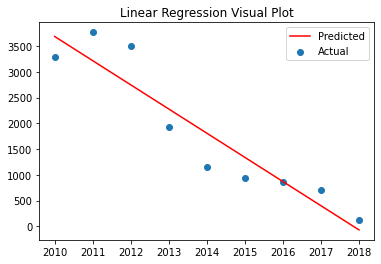



**************************************** 2 ****************************************
Model : Decision Tree Regressor
coefficient of Determination: 1.0
Mean Squared Error: 0.0


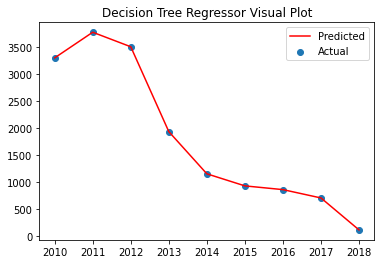



**************************************** 3 ****************************************
Model : Support Vector Regression
coefficient of Determination: -0.25485392850662314
Mean Squared Error: 2103848.777777778


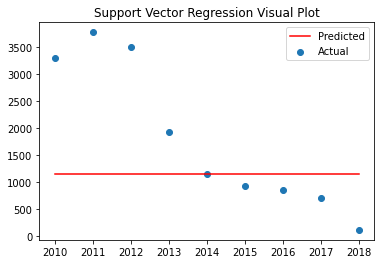



**************************************** 4 ****************************************
Model : Gradient Boosting Regressor
coefficient of Determination: 0.999999999111286
Mean Squared Error: 0.0014899899638113972


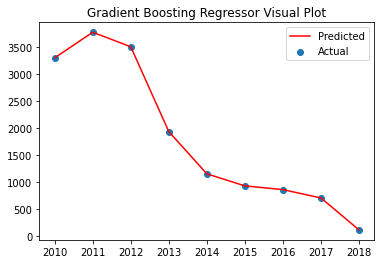

In [ ]:
for i, (model_name,model) in enumerate(regressors.items()):
  model.fit(x,y)
  y_pred = model.predict(x)

  r_sq = model.score(x, y)
  lin_mse = mean_squared_error(y, y_pred)
  print(f"{'*'*40} {i+1} {'*'*40}")
  print(f'Model : {model_name}')
  print(f'coefficient of Determination: {r_sq}')
  print(f'Mean Squared Error: {lin_mse}')

  plt.scatter(x,y)
  plt.plot(x, y_pred, color='red')
  plt.title(f'{model_name} Visual Plot')
  plt.legend(['Predicted','Actual'])
  plt.show()

  print()
  print()  

In [ ]:
mod = regressors['Linear Regression']
mod.fit(x,y)
y_19_pred = mod.predict([[2019]])

In [ ]:
print(f'The projected number of felony arrests in 2019 is {y_19_pred[0]:.0f}.')

The projected number of felony arrests in 2019 is -540.


# Q6

In [ ]:
bradbury = arrests_18[(arrests_18.Lat != 0) & (arrests_18.Lon != 0)]

In [ ]:
def haversine(x):
    """
    This function calculates distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1 = x['Lon']
    lat1 = x['Lat']
    lat2 = 34.050536
    lon2 = -118.247861
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
bradbury = bradbury.assign(Occurrence_Distance = bradbury.apply(haversine,axis=1))

In [ ]:
bradbury.sample(2)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,Lat,Lon,Occurrence_Distance
433892,180609749,2018-01-31,940.0,6.0,Hollywood,666.0,46.0,F,W,24.0,Miscellaneous Other Violations,M,41.24ALAMC,TRESPASS ON PVT PROP W/SIGN POSTED,01400 N GOWER ST,NaN,"34.0944, -118.3277",34.0944,-118.3277,8.824160
52642,5347281,2018-06-22,1215.0,1.0,Central,155.0,52.0,M,B,3.0,Robbery,F,211PC,ROBBERY,6TH,MAPLE,"34.0439, -118.2479",34.0439,-118.2479,0.737898


In [ ]:
bradbury = bradbury.loc[bradbury['Occurrence_Distance']<=2]

In [ ]:
print(f'{bradbury.shape[0]} arrest incidents occurred within 2 km from the Bradbury Building in 2018.')

5913 arrest incidents occurred within 2 km from the Bradbury Building in 2018.


# Q7

In [ ]:
pico_boulevard = arrests_18.loc[arrests_18['Address'].str.contains('PICO', na=False)]

In [ ]:
pico_boulevard = pico_boulevard[(np.abs(stats.zscore(pico_boulevard[['Lat','Lon']])) < 3).all(axis=1)]

In [ ]:
def distance(x):
    """
    This function calculates distance between geographical points 
    on the earth (specified in decimal degrees) to determine its length
    """
    # convert decimal degrees to radians 
    lon1 = x['Lon'].min()
    lat1 = x['Lat'].min()
    lat2 = x['Lat'].max()
    lon2 = x['Lon'].max()
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return round(km,2)

In [ ]:
print(f'The estimated the length of Pico Boulevard is {distance(pico_boulevard)} km.')

The estimated the length of Pico Boulevard is 19.15 km.


In [ ]:
pico_lat = (pico_boulevard.Lat.min() + pico_boulevard.Lat.max())/2
pico_lon = (pico_boulevard.Lon.min() + pico_boulevard.Lon.max())/2

In [ ]:
def haversine_pico(x):
    """
    This function calculates distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1 = x['Lon']
    lat1 = x['Lat']
    lat2 = pico_lat
    lon2 = pico_lon
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
pico_boulevard = pico_boulevard.assign(Occurrence_Distance = pico_boulevard.apply(haversine_pico,axis=1))

In [ ]:
pico_boulevard.sample(2)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,Lat,Lon,Occurrence_Distance
438778,180814498,2018-08-09,920.0,8.0,West LA,884.0,58.0,M,W,18.0,Drunkeness,I,41.27CLAMC,DRINKING IN PUBLIC,PICO,SAWTELLE,"34.0347, -118.4397",34.0347,-118.4397,8.254967
438965,180814841,2018-08-15,1155.0,8.0,West LA,853.0,60.0,M,W,18.0,Drunkeness,I,41.27CLAMC,DRINKING IN PUBLIC,PICO,BEVERWIL,"34.0445, -118.4491",34.0445,-118.4491,9.067448


In [ ]:
pico_boulevard = pico_boulevard.loc[pico_boulevard['Occurrence_Distance']<=1]

In [ ]:
print(f'{pico_boulevard.shape[0]} incidents were made per kilometer on Pico Boulevard during 2018')

9 incidents were made per kilometer on Pico Boulevard during 2018
